In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import io
import seaborn as sns

In [2]:
from google.colab import files
uploaded = files.upload()

Saving movies.csv to movies.csv


In [3]:

df = pd.read_csv(io.StringIO(uploaded['movies.csv'].decode('utf-8')))
df

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime
0,The Shining,R,Drama,1980,"June 13, 1980 (United States)",8.4,927000.0,Stanley Kubrick,Stephen King,Jack Nicholson,United Kingdom,19000000.0,46998772.0,Warner Bros.,146.0
1,The Blue Lagoon,R,Adventure,1980,"July 2, 1980 (United States)",5.8,65000.0,Randal Kleiser,Henry De Vere Stacpoole,Brooke Shields,United States,4500000.0,58853106.0,Columbia Pictures,104.0
2,Star Wars: Episode V - The Empire Strikes Back,PG,Action,1980,"June 20, 1980 (United States)",8.7,1200000.0,Irvin Kershner,Leigh Brackett,Mark Hamill,United States,18000000.0,538375067.0,Lucasfilm,124.0
3,Airplane!,PG,Comedy,1980,"July 2, 1980 (United States)",7.7,221000.0,Jim Abrahams,Jim Abrahams,Robert Hays,United States,3500000.0,83453539.0,Paramount Pictures,88.0
4,Caddyshack,R,Comedy,1980,"July 25, 1980 (United States)",7.3,108000.0,Harold Ramis,Brian Doyle-Murray,Chevy Chase,United States,6000000.0,39846344.0,Orion Pictures,98.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7663,More to Life,NaN,Drama,2020,"October 23, 2020 (United States)",3.1,18.0,Joseph Ebanks,Joseph Ebanks,Shannon Bond,United States,7000.0,NaN,NaN,90.0
7664,Dream Round,NaN,Comedy,2020,"February 7, 2020 (United States)",4.7,36.0,Dusty Dukatz,Lisa Huston,Michael Saquella,United States,NaN,NaN,Cactus Blue Entertainment,90.0
7665,Saving Mbango,NaN,Drama,2020,"April 27, 2020 (Cameroon)",5.7,29.0,Nkanya Nkwai,Lynno Lovert,Onyama Laura,United States,58750.0,NaN,Embi Productions,NaN
7666,It's Just Us,NaN,Drama,2020,"October 1, 2020 (United States)",NaN,NaN,James Randall,James Randall,Christina Roz,United States,15000.0,NaN,NaN,120.0


In [4]:
for col in df.columns:
    pct_missing = np.mean(df[col].isnull())
    print('{} - {}%'.format(col, round(pct_missing*100)))

name - 0%
rating - 1%
genre - 0%
year - 0%
released - 0%
score - 0%
votes - 0%
director - 0%
writer - 0%
star - 0%
country - 0%
budget - 28%
gross - 2%
company - 0%
runtime - 0%


In [5]:
# xem kieu du lieu 
df.dtypes

name         object
rating       object
genre        object
year          int64
released     object
score       float64
votes       float64
director     object
writer       object
star         object
country      object
budget      float64
gross       float64
company      object
runtime     float64
dtype: object

In [6]:
df['budget'].fillna( method ='ffill', inplace = True) 
df['gross'].fillna( method ='ffill', inplace = True) 
df['votes'].fillna( method ='ffill', inplace = True) 
df['runtime'].fillna( method ='ffill', inplace = True) 
# fill data rỗng bằng hàm fillna

In [7]:
#chuyen kieu data từ float-->int64
df['budget'] =  df['budget'].astype('int64')

df['gross'] =  df['gross'].astype('int64')
df['votes'] =  df['votes'].astype('int64')
df['runtime'] =  df['runtime'].astype('int64')




In [8]:
#loai bo data bi trung
pd.set_option('display.max_rows',None)
df.drop_duplicates()
df['company'].drop_duplicates().sort_values(inplace=False)


4345                      "DIA" Productions GmbH & Co. KG
7525                  "Weathering With You" Film Partners
3024                                      .406 Production
3748                                   1+2 Seisaku Iinkai
5813                                      10 West Studios
4054                                            120 Films
5610                                          120dB Films
3787                                       13 Productions
2929                                        1492 Pictures
385                                      1818 Productions
4412                                     19 Entertainment
7109                                           1978 Films
6517                     1984 Private Defense Contractors
2760                 1992 Number Four Limited Partnership
4151                                         2 Loop Films
7489                                    2.0 Entertainment
5195                                         2.4.7. Films
4559          

In [9]:
df1= df.sort_values(by=['gross'], inplace=False, ascending=False)
df1.head()

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime
5445,Avatar,PG-13,Action,2009,"December 18, 2009 (United States)",7.8,1100000,James Cameron,James Cameron,Sam Worthington,United States,237000000,2847246203,Twentieth Century Fox,162
7445,Avengers: Endgame,PG-13,Action,2019,"April 26, 2019 (United States)",8.4,903000,Anthony Russo,Christopher Markus,Robert Downey Jr.,United States,356000000,2797501328,Marvel Studios,181
3045,Titanic,PG-13,Drama,1997,"December 19, 1997 (United States)",7.8,1100000,James Cameron,James Cameron,Leonardo DiCaprio,United States,200000000,2201647264,Twentieth Century Fox,194
6663,Star Wars: Episode VII - The Force Awakens,PG-13,Action,2015,"December 18, 2015 (United States)",7.8,876000,J.J. Abrams,Lawrence Kasdan,Daisy Ridley,United States,245000000,2069521700,Lucasfilm,138
7244,Avengers: Infinity War,PG-13,Action,2018,"April 27, 2018 (United States)",8.4,897000,Anthony Russo,Christopher Markus,Robert Downey Jr.,United States,321000000,2048359754,Marvel Studios,149


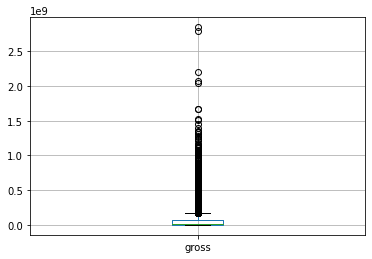

In [ ]:
df.boxplot(column=['gross'])

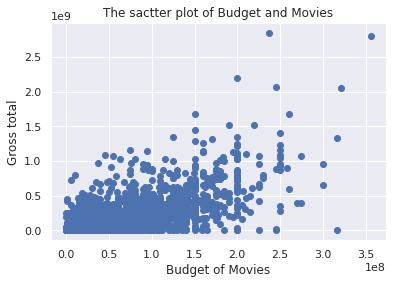

In [10]:
sns.set()
plt.scatter(x=df['budget'],y=df['gross'])
plt.title('The sactter plot of Budget and Movies')
plt.xlabel('Budget of Movies')
plt.ylabel('Gross total')
plt.show()


In [12]:
#he so tuong quan pearson
df.corr(method='pearson')

,year,score,votes,budget,gross,runtime
year,1.000000,0.097995,0.222427,0.334314,0.261550,0.120694
score,0.097995,1.000000,0.409182,0.080804,0.186337,0.399288
votes,0.222427,0.409182,1.000000,0.449422,0.632341,0.309140
budget,0.334314,0.080804,0.449422,1.000000,0.701819,0.263424
gross,0.261550,0.186337,0.632341,0.701819,1.000000,0.245443
runtime,0.120694,0.399288,0.309140,0.263424,0.245443,1.000000


Ta có thể thấy là sự tương quan giữa chi phí và lợi nhuận là khá cao, điều đó cho thấy kinh phí làm phim tỷ lệ thuận với lợi nhuận

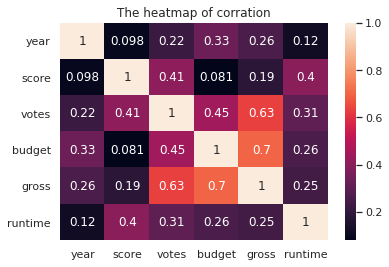

In [17]:
corr_matrix = df.corr(method='pearson')
sns.heatmap(corr_matrix,annot=True)
plt.title('The heatmap of corration')
plt.show()